<img src="images/logoUB.svg"  style="max-width:20%">

# Final project Machine Learning 2019-2020
#### Master in Innovation and Entrepreneurship in Biomedical Engineering
###### Authors: Arantxa Palma Rotaeche, Mónica Tuta

<center>
<h4>
    Heart disease binary classification from clinical data - Data Exploration
    </h4> 
<img src="images/heartDesease.jpg"  style="max-width:30%">
</center>
<center>

<h5>General workflow</h5>
This notebook covers until data exploration in the following diagram <br>
The remaining steps are found in the notebook <b>02_Modeling.ipynb</b><br>
    <center>
<img src="images/newFlowDiagram.png"  style="max-width:50%">
    </center>

## Contents

1. [Problem description](#pd)
1. [Upload data](#ud)
1. [Data description](#dd)
1. [Data exploration and preprocessing](#de)
    1. Identify the data types
    1. Identify and treat "NaN" values
    1. Visualization:
        1. Numeric:
            1. Correlation
            1. Histograms
            1. Scatterplot
            1. Barplot
            1. Boxplot
        1. Categoric:
            1. Frequency
    1. Dimensionality reduction - Feature Selection

### Problem Description <a class="anchor" id="pd"></a>

According to the World Health Organization, cardiovascular diseases (CVDs) are the **number 1** cause of death globally, around **17.9 million** people die each year, **31%** of the deaths worldwide. More than **75%** of the cases occur in low and middle income countries and **85%** are due to heart attacks and strokes. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.<br>

Individuals at risk of CVD may demonstrate raised blood pressure, glucose, and lipids as well as overweight and obesity. Millions of people worldwide struggle to control the risk factors that lead to cardiovascular disease, many others remain unaware that they are at high risk. Many heart attacks and strokes can be prevented by controlling major risk factors through lifestyle interventions and drug treatment where necessary.<br>

The risk factors for CVD include behavioral factors, such as tobacco use, an unhealthy diet, harmful use of alcohol and inadequate physical activity, and physiological factors, including high blood pressure (hypertension), high blood cholesterol and high blood sugar or glucose which are linked to underlying social determinants and drivers, such as ageing, income and urbanization.<br>

*Identifying those at highest risk of CVDs and ensuring they receive appropriate treatment can prevent premature deaths. One way is to perform analyses (quantitative) to predict or classify whether the population are prone to CVDs according to significantly health features and act on them in advance*

#### Packages

In [1]:
#Load libraries

library(ggpubr)
suppressMessages(library(tidyverse))
library(Hmisc)
library(corrplot)
library(purrr)
library(tidyr)
#Libraries for plots
library(ggplot2)
library(repr)
library(dplyr)
library(gridExtra)
#Library for dummy variables
library(dummies)
#Libraries for feature selection
library("Boruta")
library("mlbench")
library("caret")
#Library for LDA
library("MASS")
#Library for KNN
library(class)
#Libraries for Decision trees
library(rpart)
library(rpart.plot)
#Library for SVM and Naive Bayes
library(e1071)
#Library for ROC and AUC
library("pROC")

Loading required package: ggplot2


Loading required package: lattice


Loading required package: survival


Loading required package: Formula



Attaching package: ‘Hmisc’



The following objects are masked from ‘package:dplyr’:

    src, summarize



The following objects are masked from ‘package:base’:

    format.pval, units



corrplot 0.84 loaded



Attaching package: ‘gridExtra’



The following object is masked from ‘package:dplyr’:

    combine



dummies-1.5.6 provided by Decision Patterns




Attaching package: ‘caret’



The following object is masked from ‘package:survival’:

    cluster



The following object is masked from ‘package:purrr’:

    lift




Attaching package: ‘MASS’



The following object is masked from ‘package:dplyr’:

    select




Attaching package: ‘e1071’



The following object is masked from ‘package:Hmisc’:

    impute



Type 'citation("pROC")' for a citation.



Attaching package: ‘pROC’



The following objects are masked from ‘package:stats’:

    cov, smooth, var



### Upload Data <a class="anchor" id="ud"></a>

The dataset can be found at: <br>
https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
## Upload dataset
heartOriginal <- read.csv(file = 'heart.csv')
cat('Dimension of the dataset:', dim(heartOriginal)[1],"x",dim(heartOriginal)[2])
head(heartOriginal)

Dimension of the dataset: 303 x 14

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


### Data description <a class="anchor" id="dd"></a>

#### Contents

- age - age in years
- **sex** - (1 = male; 0 = female)
- **cp** - chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **restecg** - resting electrocardiographic results (0= normal, 1= having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV), 2= showing probable or definite left ventricular hypertrophy)
- thalach - maximum heart rate achieved
- **exang** - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- **slope** - the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
- ca - number of major vessels (0-3) colored by flourosopy
- **thal** - (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target** - have disease or not (1=yes, 0=no)


**Bold** features are categorical

***Creators***:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
1. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

#### Summary

In [3]:
summary(heartOriginal)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

### Data Exploration and Preprocessing<a class="anchor" id="de"></a>

#### Identify Data Type

In [4]:
## Data exploration
str(heartOriginal)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : int  0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : int  1 2 2 2 2 1 2 3 3 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...


#### Identify and treat "NaN" values

In [5]:
#### Checking if there are values codified as NA
cat("Number of Na in the dataset:",sum(is.na(heartOriginal)))

#### Eliminating missing variables in "Thal".
#The categories labeled with 0 are considered as NaN values here as well because in the description of the dataset they are not considered as a real category but as missing values
heartOriginal$thal[heartOriginal$thal == "0"] <- NA
heartOriginal%>% count(thal)
heart<- na.omit(heartOriginal)
heart%>% count(thal)
cat("New dimension of the dataset: ", dim(heart)[1], "x", dim(heart)[2])

#Data for latter use
heartForLatterUse<-heart

Number of Na in the dataset: 0

thal,n
<int>,<int>
1,18
2,166
3,117
NA,2


thal,n
<int>,<int>
1,18
2,166
3,117


New dimension of the dataset:  301 x 14

#### Visualization

##### Numeric

###### Correlation

In [6]:
# Dataframe with only numeric variables
heart_numeric <- heart[ , -which(names(heart) %in% c("sex","cp","fbs","restecg","exang","slope","thal"))]

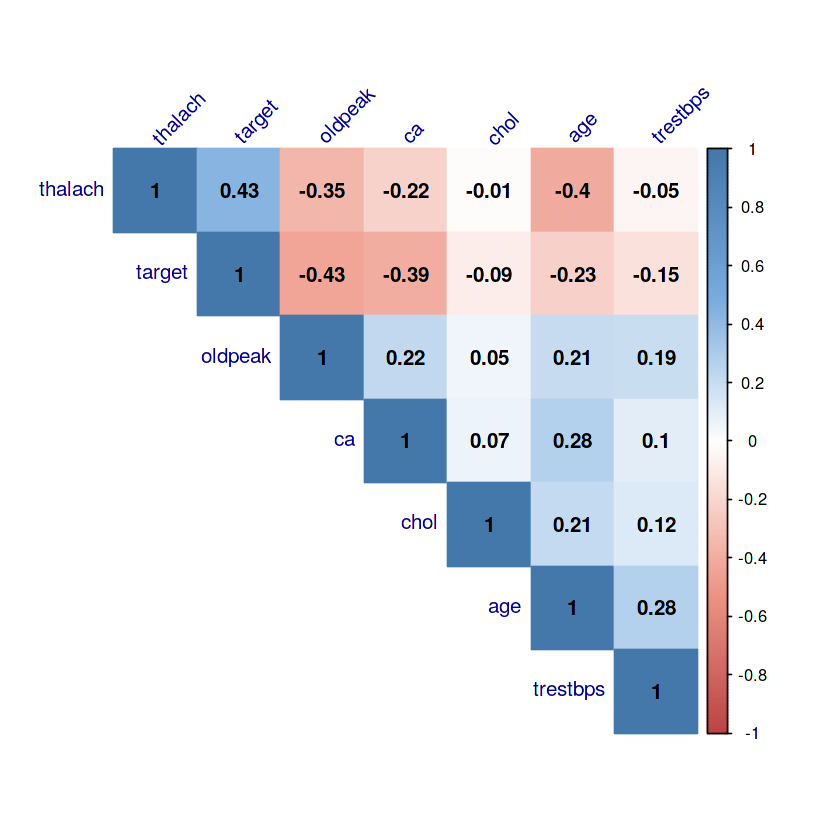

In [7]:
# Correlation matrix and plot
correlation <- cor(heart_numeric)
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(correlation, method = "color", col = col(200),
         type = "upper", order = "hclust",
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "darkblue", tl.srt = 45, #Text label color and rotation
         )

###### Distribution - Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


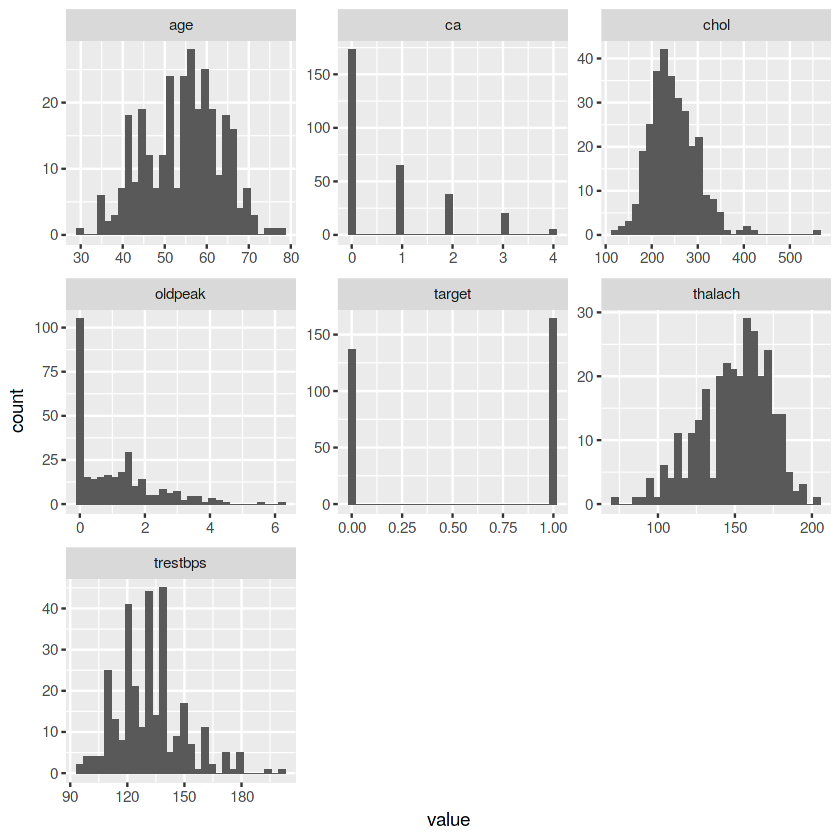

In [8]:
heart_numeric %>%
  gather() %>%
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram()

###### Scatterplot

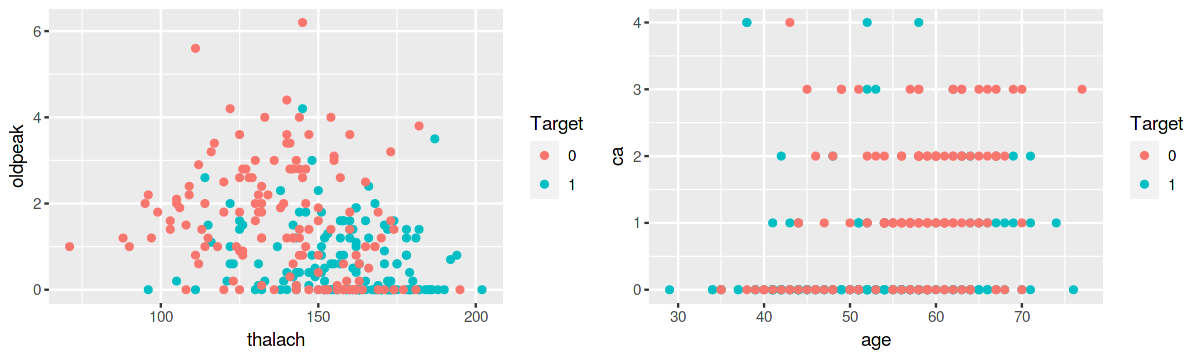

In [9]:
# Scatter plot comparing thalach-oldpeak and age-ca, with color representing target
options(repr.plot.width=10, repr.plot.height=3)
Target <-factor(heart_numeric$target)
p1 <- ggplot(heart_numeric)+
geom_point(aes(x=thalach, y=oldpeak, color=Target))
p2 <- ggplot(heart_numeric)+
geom_point(aes(x=age, y=ca, color=Target))

grid.arrange(p1, p2, nrow = 1)#subplot
options(repr_option_defaults)

###### Barplot

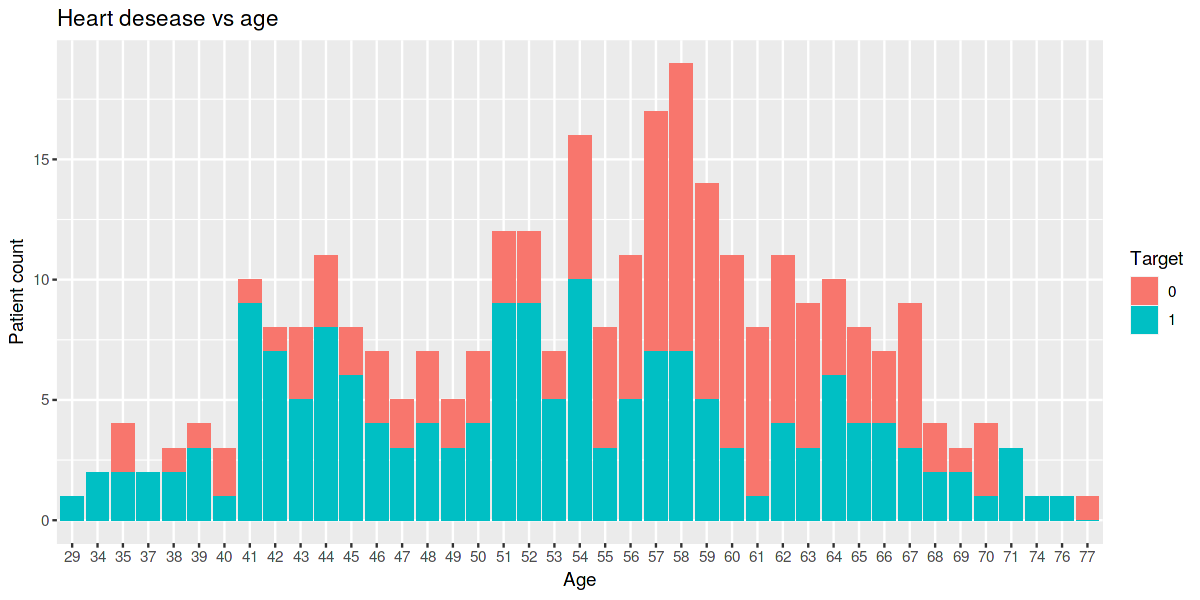

In [10]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(as.data.frame(table(heart_numeric$age,heart_numeric$target)), aes(x = Var1, y = Freq, fill = Var2)) +
    geom_bar(stat="identity")+
   labs(y = "Patient count",
         x = "Age",
         fill = "Target",
         title = "Heart desease vs age")

In [11]:
age_bins <- c(20,30,40,50,60,70,80) #bins for age
age_cut <- cut(heart_numeric$age, age_bins) #Divide the interval with the bins

trestbps_bins <- c(80,100,120,140,160,180) #bins for trestbps
trestbps_cut <- cut(heart_numeric$trestbps, trestbps_bins) #Divide the interval with the bins

chol_bins <- c(100,150,200,250,300,350,400,450) #bins for trestbps
chol_cut <- cut(heart_numeric$chol, chol_bins) #Divide the interval with the bins

thalach_bins <- c(60,85,110,135,150,175,200,225) #bins for thalach
thalach_cut <- cut(heart_numeric$thalach, thalach_bins) #Divide the interval with the bins

oldpeak_bins <- c(0,1,2,3,4,5,6,7) #bins for oldpeak
oldpeak_cut <- cut(heart_numeric$oldpeak, oldpeak_bins) #Divide the interval with the bins

ca_bins <- c(0,1,2,3,4) #bins for ca
ca_cut <- cut(heart_numeric$ca, ca_bins) #Divide the interval with the bins

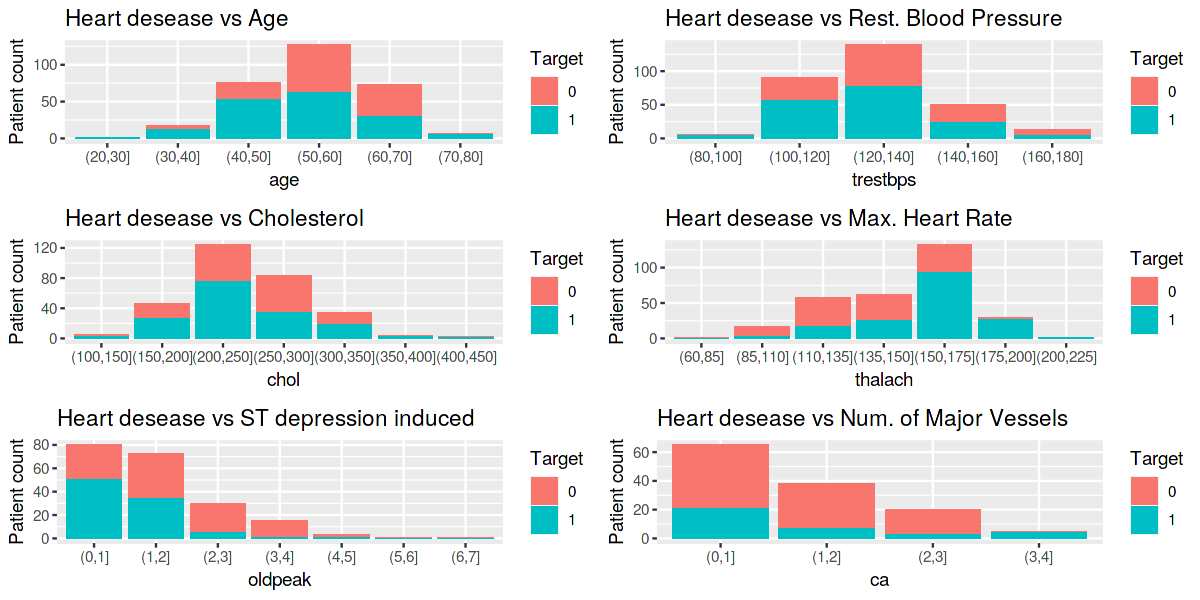

In [12]:
options(repr.plot.width=10, repr.plot.height=5)
p_age <- ggplot(as.data.frame(table(age_cut,heart_numeric$target)), aes(x = age_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+
               labs(y = "Patient count",
                     x = "age",
                     fill = "Target",
                     title = "Heart desease vs Age")
p_trestbps <- ggplot(as.data.frame(table(trestbps_cut,heart_numeric$target)), aes(x = trestbps_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+
               labs(y = "Patient count",
                     x = "trestbps",
                     fill = "Target",
                     title = "Heart desease vs Rest. Blood Pressure")
p_chol <- ggplot(as.data.frame(table(chol_cut,heart_numeric$target)), aes(x = chol_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+
               labs(y = "Patient count",
                     x = "chol",
                     fill = "Target",
                     title = "Heart desease vs Cholesterol")
p_thalach <- ggplot(as.data.frame(table(thalach_cut,heart_numeric$target)), aes(x = thalach_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+
               labs(y = "Patient count",
                     x = "thalach",
                     fill = "Target",
                     title = "Heart desease vs Max. Heart Rate")
p_oldpeak <- ggplot(as.data.frame(table(oldpeak_cut,heart_numeric$target)), aes(x = oldpeak_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+
               labs(y = "Patient count",
                     x = "oldpeak",
                     fill = "Target",
                     title = "Heart desease vs ST depression induced")
p_ca <- ggplot(as.data.frame(table(ca_cut,heart_numeric$target)), aes(x = ca_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+
               labs(y = "Patient count",
                     x = "ca",
                     fill = "Target",
                     title = "Heart desease vs Num. of Major Vessels")

#subplots
grid.arrange(p_age, p_trestbps, p_chol, p_thalach, p_oldpeak, p_ca, nrow = 3)
options(repr_option_defaults)

###### Boxplot

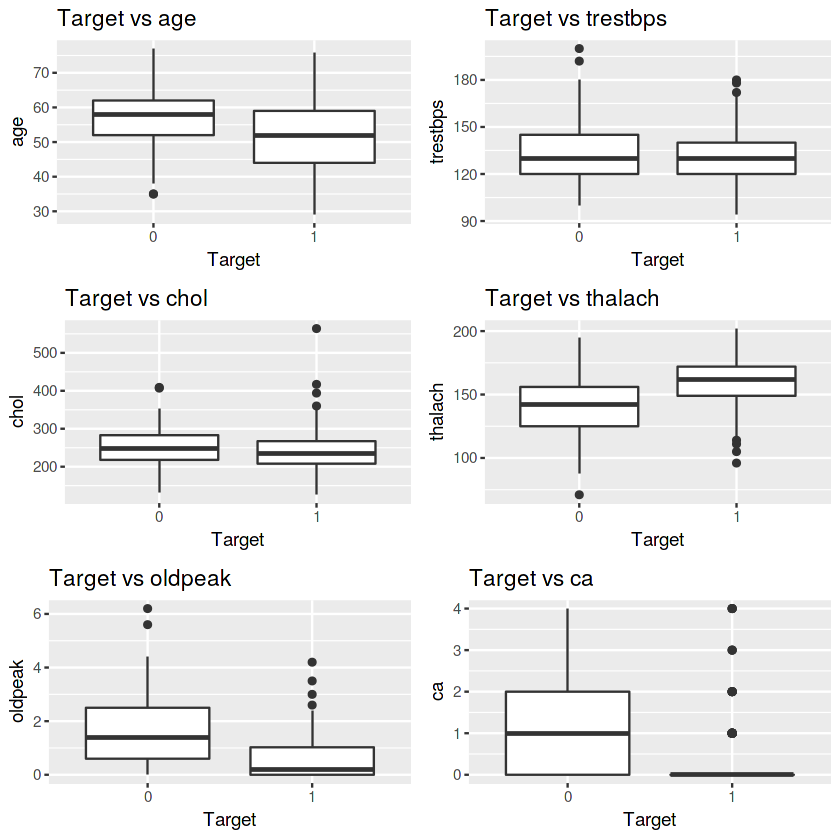

In [13]:
targetAge <- ggplot(data = heart, mapping = aes(x =  Target, y = age)) +
     geom_boxplot()+
     labs(title="Target vs age")

targetTrestbps <- ggplot(data = heart, mapping = aes(x =  Target, y = trestbps)) +
     geom_boxplot()+
     labs(title="Target vs trestbps")

targetChol <- ggplot(data = heart, mapping = aes(x =  Target, y = chol)) +
     geom_boxplot()+
     labs(title="Target vs chol")

targetThalach <- ggplot(data = heart, mapping = aes(x =  Target, y = thalach)) +
     geom_boxplot()+
     labs(title="Target vs thalach")

targetOldpeak<- ggplot(data = heart, mapping = aes(x =  Target, y = oldpeak)) +
     geom_boxplot()+
     labs(title="Target vs oldpeak")

targetCa <- ggplot(data = heart, mapping = aes(x =  Target, y = ca)) +
     geom_boxplot()+
     labs(title="Target vs ca")

grid.arrange(targetAge, targetTrestbps,
             targetChol, targetThalach,
             targetOldpeak, targetCa, ncol = 2)

##### Categoric

###### Frequency

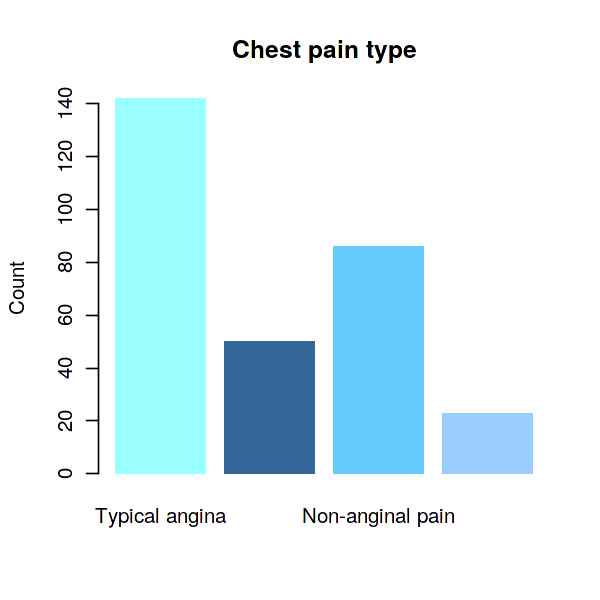

In [14]:

options(repr.plot.width=5, repr.plot.height=5)
barplot(table(heart$cp),width = c( 0.2 , 0.2 ),ylab = "Count",border = NA,
        main = "Chest pain type",col=c("#99FFFF","#336699","#66CCFF","#99CCFF"),names.arg=c("Typical angina", "Atypical angina","Non-anginal pain","Asymptomatic"))


In [15]:
#Correlation cp with other categorical variables
chisq.test(heart$cp, heart$sex)
chisq.test(heart$cp, heart$fbs)
chisq.test(heart$cp, heart$exang)
chisq.test(heart$cp, heart$slope)
chisq.test(heart$cp, heart$thal)
chisq.test(heart$cp, heart$target)


	Pearson's Chi-squared test

data:  heart$cp and heart$sex
X-squared = 6.2286, df = 3, p-value = 0.101


Warning message in chisq.test(heart$cp, heart$fbs):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$cp and heart$fbs
X-squared = 4.4126, df = 3, p-value = 0.2202



	Pearson's Chi-squared test

data:  heart$cp and heart$exang
X-squared = 65.882, df = 3, p-value = 3.248e-14


Warning message in chisq.test(heart$cp, heart$slope):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$cp and heart$slope
X-squared = 26.92, df = 6, p-value = 0.0001499


Warning message in chisq.test(heart$cp, heart$thal):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$cp and heart$thal
X-squared = 41.071, df = 6, p-value = 2.804e-07



	Pearson's Chi-squared test

data:  heart$cp and heart$target
X-squared = 80.139, df = 3, p-value < 2.2e-16


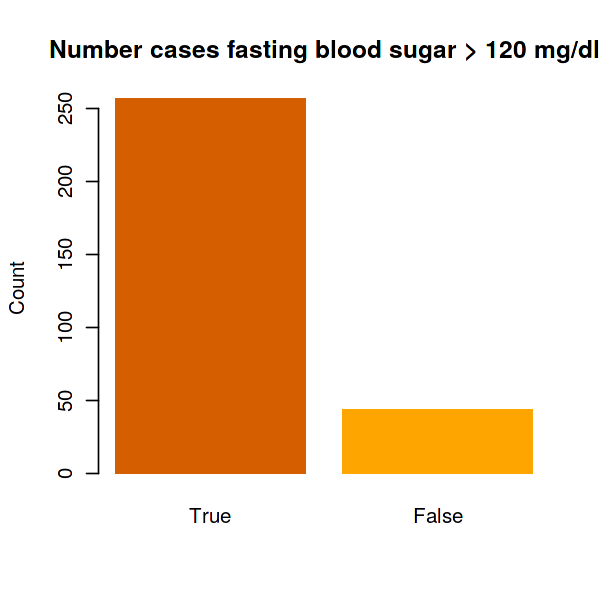

In [16]:

barplot(table(heart$fbs), ylab = "Count",border = NA,
        main = "Number cases fasting blood sugar > 120 mg/dl",col=c("#D55E00","orange"),names.arg=c("True", "False"))


In [17]:
#Correlation fbs with other categorical variables
chisq.test(heart$fbs, heart$sex)
chisq.test(heart$fbs, heart$cp)
chisq.test(heart$fbs, heart$exang)
chisq.test(heart$fbs, heart$slope)
chisq.test(heart$fbs, heart$thal)
chisq.test(heart$fbs, heart$target)


	Pearson's Chi-squared test with Yates' continuity correction

data:  heart$fbs and heart$sex
X-squared = 0.23708, df = 1, p-value = 0.6263


Warning message in chisq.test(heart$fbs, heart$cp):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$fbs and heart$cp
X-squared = 4.4126, df = 3, p-value = 0.2202



	Pearson's Chi-squared test with Yates' continuity correction

data:  heart$fbs and heart$exang
X-squared = 0.0036879, df = 1, p-value = 0.9516


Warning message in chisq.test(heart$fbs, heart$slope):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$fbs and heart$slope
X-squared = 3.6071, df = 2, p-value = 0.1647


Warning message in chisq.test(heart$fbs, heart$thal):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$fbs and heart$thal
X-squared = 3.6223, df = 2, p-value = 0.1635



	Pearson's Chi-squared test with Yates' continuity correction

data:  heart$fbs and heart$target
X-squared = 0.024057, df = 1, p-value = 0.8767


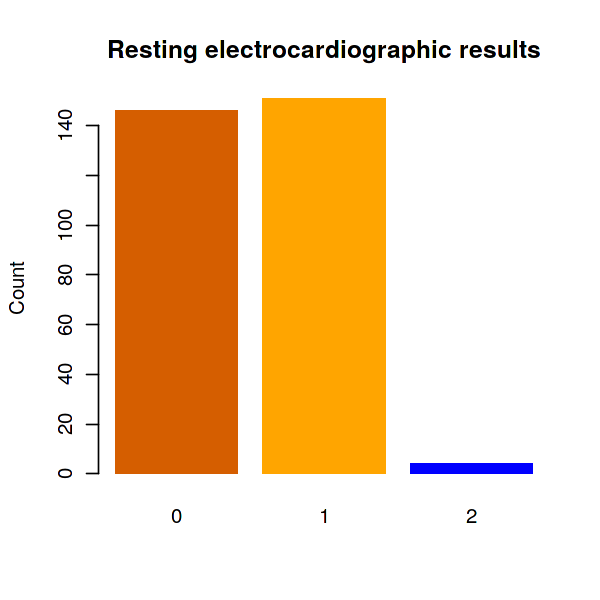

In [18]:
barplot(table(heart$restecg), ylab = "Count",border = NA,
        main = "Resting electrocardiographic results",col=c("#D55E00","orange","blue","green"))

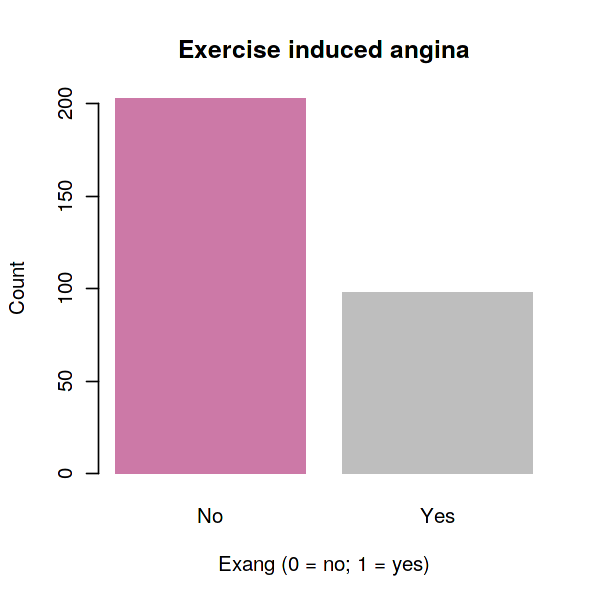

In [19]:
barplot(table(heart$exang), xlab = "Exang (0 = no; 1 = yes)", ylab = "Count",border = NA,
        main = "Exercise induced angina",col=c("#CC79A7","gray"),names.arg=c("No", "Yes"))

In [20]:
#Correlation exang with other categorical variables
chisq.test(heart$exang, heart$sex)
chisq.test(heart$exang, heart$fbs)
chisq.test(heart$exang, heart$cp)
chisq.test(heart$exang, heart$slope)
chisq.test(heart$exang, heart$thal)
chisq.test(heart$exang, heart$target)


	Pearson's Chi-squared test with Yates' continuity correction

data:  heart$exang and heart$sex
X-squared = 4.9781, df = 1, p-value = 0.02567



	Pearson's Chi-squared test with Yates' continuity correction

data:  heart$exang and heart$fbs
X-squared = 0.0036879, df = 1, p-value = 0.9516



	Pearson's Chi-squared test

data:  heart$exang and heart$cp
X-squared = 65.882, df = 3, p-value = 3.248e-14



	Pearson's Chi-squared test

data:  heart$exang and heart$slope
X-squared = 24.13, df = 2, p-value = 5.757e-06



	Pearson's Chi-squared test

data:  heart$exang and heart$thal
X-squared = 32.744, df = 2, p-value = 7.758e-08



	Pearson's Chi-squared test with Yates' continuity correction

data:  heart$exang and heart$target
X-squared = 54.528, df = 1, p-value = 1.532e-13


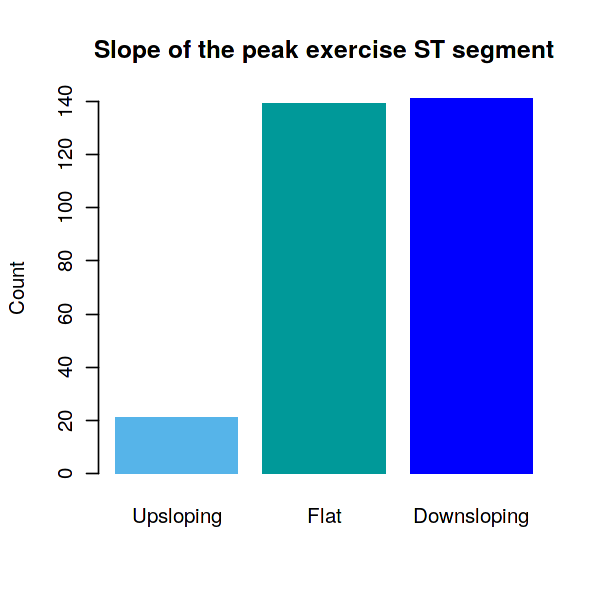

In [21]:
barplot(table(heart$slope),ylab = "Count",border = NA,
        main = "Slope of the peak exercise ST segment",col=c("#56B4E9","#009999", "#0000FF"), names.arg=c("Upsloping", "Flat","Downsloping"))

In [22]:
#Correlation slope with other categorical variables
chisq.test(heart$slope, heart$sex)
chisq.test(heart$slope, heart$fbs)
chisq.test(heart$slope, heart$exang)
chisq.test(heart$slope, heart$cp)
chisq.test(heart$slope, heart$thal)
chisq.test(heart$slope, heart$target)


	Pearson's Chi-squared test

data:  heart$slope and heart$sex
X-squared = 0.63488, df = 2, p-value = 0.728


Warning message in chisq.test(heart$slope, heart$fbs):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$slope and heart$fbs
X-squared = 3.6071, df = 2, p-value = 0.1647



	Pearson's Chi-squared test

data:  heart$slope and heart$exang
X-squared = 24.13, df = 2, p-value = 5.757e-06


Warning message in chisq.test(heart$slope, heart$cp):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$slope and heart$cp
X-squared = 26.92, df = 6, p-value = 0.0001499


Warning message in chisq.test(heart$slope, heart$thal):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$slope and heart$thal
X-squared = 35.122, df = 4, p-value = 4.385e-07



	Pearson's Chi-squared test

data:  heart$slope and heart$target
X-squared = 46.224, df = 2, p-value = 9.175e-11


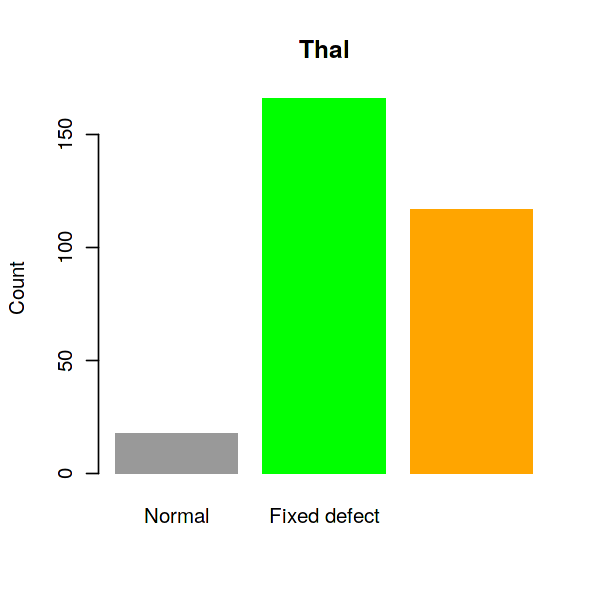

In [23]:
# ARA CAMBIÉ ESTE PLOT PORQUE YA NO ESTÁ LA CATEGORÍA 0 EN THAL
#barplot(table(heart$thal), ylab = "Count",border = NA,
#        main = "Thal",col=c("#999999","green","orange"), names.arg=c("0", "Normal","Fixed defect","Reversable defect"))

barplot(table(heart$thal), ylab = "Count",border = NA,
        main = "Thal",col=c("#999999","green","orange"), names.arg=c("Normal","Fixed defect","Reversable defect"))

In [24]:
#Correlation cp with other categorical variables
chisq.test(heart$thal, heart$sex)
chisq.test(heart$thal, heart$fbs)
chisq.test(heart$thal, heart$exang)
chisq.test(heart$thal, heart$slope)
chisq.test(heart$thal, heart$cp)
chisq.test(heart$thal, heart$target)


	Pearson's Chi-squared test

data:  heart$thal and heart$sex
X-squared = 44.405, df = 2, p-value = 2.278e-10


Warning message in chisq.test(heart$thal, heart$fbs):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$thal and heart$fbs
X-squared = 3.6223, df = 2, p-value = 0.1635



	Pearson's Chi-squared test

data:  heart$thal and heart$exang
X-squared = 32.744, df = 2, p-value = 7.758e-08


Warning message in chisq.test(heart$thal, heart$slope):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$thal and heart$slope
X-squared = 35.122, df = 4, p-value = 4.385e-07


Warning message in chisq.test(heart$thal, heart$cp):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  heart$thal and heart$cp
X-squared = 41.071, df = 6, p-value = 2.804e-07



	Pearson's Chi-squared test

data:  heart$thal and heart$target
X-squared = 85.297, df = 2, p-value < 2.2e-16


##### Target

###### Frequency

In [25]:
heart%>% count(target)
(tableTargetSex <- heart%>% count(target,sex))
str(tableTargetSex)
(TargetSex<-as.data.frame(tableTargetSex))

target,n
<int>,<int>
0,137
1,164


target,sex,n
<int>,<int>,<int>
0,0,24
0,1,113
1,0,71
1,1,93


tibble [4 × 3] (S3: tbl_df/tbl/data.frame)
 $ target: int [1:4] 0 0 1 1
 $ sex   : int [1:4] 0 1 0 1
 $ n     : int [1:4] 24 113 71 93
 - attr(*, "na.action")= 'omit' Named int [1:2] 49 282
  ..- attr(*, "names")= chr [1:2] "49" "282"


target,sex,n
<int>,<int>,<int>
0,0,24
0,1,113
1,0,71
1,1,93


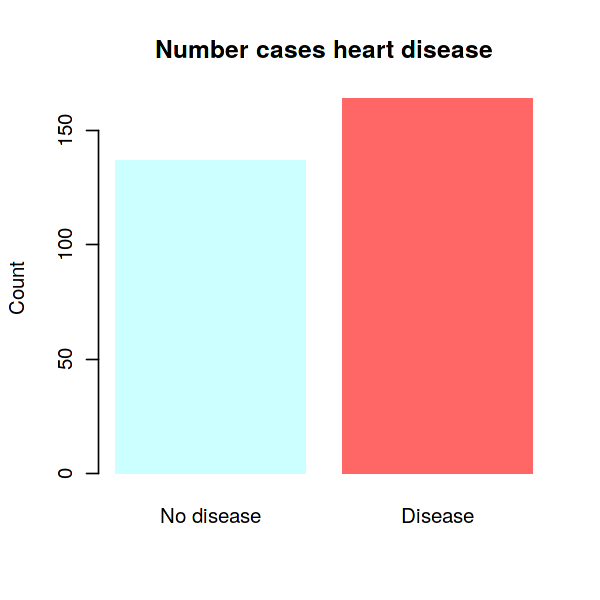

In [26]:
barplot(table(heart$target), ylab = "Count",border = NA,
        main = "Number cases heart disease",col=c("#CCFFFF","#FF6666"),names.arg=c("No disease", "Disease"))

In [27]:
Nodisease <- sum(heart$target == 0)
Disease <- sum(heart$target == 1)
Totaltarget <- length(heart$target)
PercNodisease <- round(Nodisease*100/Totaltarget)
Percdisease <- round(Disease*100/Totaltarget)
paste("Percentage of patients that do not have heart disease: ",PercNodisease,"%")
paste("Percentage of patients that have heart disease: ",Percdisease,"%")

[1] "Percentage of patients that do not have heart disease:  46 %"

[1] "Percentage of patients that have heart disease:  54 %"

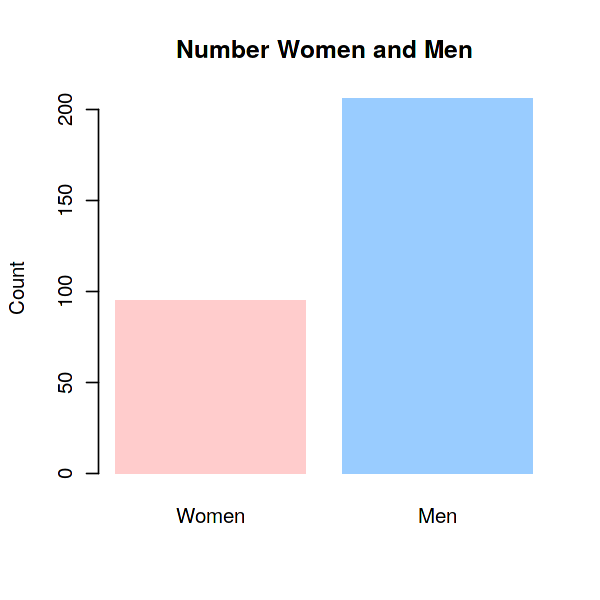

In [28]:
barplot(table(heart$sex), ylab = "Count",border = NA,
        main = "Number Women and Men",col=c("#FFCCCC","#99CCFF"), names.arg=c("Women", "Men"))

In [29]:
#Number of no disease cases by Sex
Nodiseasefemale <- sum(heart$target == 0 & heart$sex==0)
Nodiseasemale <- sum(heart$target == 0 & heart$sex==1)
paste("Number of Female patients with no heart disease: ",Nodiseasefemale)
paste("Number of Male patients with no heart disease: ",Nodiseasemale)
#Number of disease cases by Sex
Diseasefemale <- sum(heart$target == 1 & heart$sex==0)
Diseasemale <- sum(heart$target == 1 & heart$sex==1)
paste("Number of Female patients heart disease: ",Diseasefemale)
paste("Number of Male patients with heart disease: ",Diseasemale)

[1] "Number of Female patients with no heart disease:  24"

[1] "Number of Male patients with no heart disease:  113"

[1] "Number of Female patients heart disease:  71"

[1] "Number of Male patients with heart disease:  93"

In [30]:
library(ggplot2)

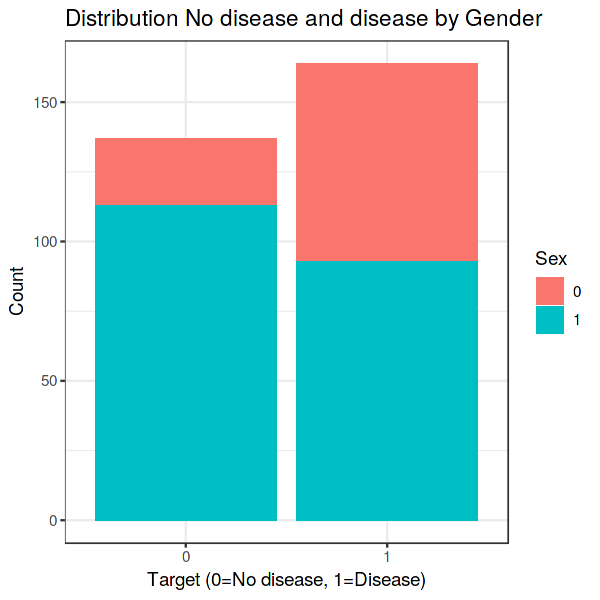

In [31]:
Sex <- factor(heart$sex)
ggplot(data=heart)+geom_bar(aes(x=factor(target),fill=Sex))+ xlab("Target (0=No disease, 1=Disease)") + 
  ylab("Count")+ggtitle(label="Distribution No disease and disease by Gender")+  theme_bw()

In [32]:
library(ggplot2)
Gender <- factor(TargetSex$sex)
plotsextarget <- ggplot(TargetSex, aes(x=Gender, y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab("Sex (0=Female, 1=Male)") + 
  ylab("Count")                 +
  ggtitle("Female and Male No Heart Disease vs Heart Disease ")  +
  theme_bw()

In [33]:
(TargetSex)

Positivecasesfemale <- TargetSex[ c(3), c(3)]
Positivecasesmale <- TargetSex[ c(4), c(3)]
Negativecasesfemale <- TargetSex[ c(1), c(3)]
Negativecasesmale <- TargetSex[ c(2), c(3)]
(CountPosNegSex <- matrix(c(Positivecasesfemale,Positivecasesmale, Negativecasesfemale,Negativecasesmale), nrow = 2, dimnames = list(Grupo = c("Female", "Male"), Target= c("Yes", "No"))))
prop.table(CountPosNegSex,margin=1)
prop.test(CountPosNegSex)


target,sex,n
<int>,<int>,<int>
0,0,24
0,1,113
1,0,71
1,1,93


,Yes,No
Female,71,24
Male,93,113


,Yes,No
Female,0.7473684,0.2526316
Male,0.4514563,0.5485437



	2-sample test for equality of proportions with continuity correction

data:  CountPosNegSex
X-squared = 21.779, df = 1, p-value = 3.059e-06
alternative hypothesis: two.sided
95 percent confidence interval:
 0.1775295 0.4142947
sample estimates:
   prop 1    prop 2 
0.7473684 0.4514563 


Conclusion: Although the proportion in Men is almost the double than in women, making an analysis if the proportion of women and men having disease is different, the P value accepted rejected the null hypothesis (<0.05) therefore the proportion is different. Therefore, although the proportion of women in the study was less, they showed more probability of having a disease.

In [34]:
library(ggplot2)
tableTargetcp <- heart%>% count(target,cp)
str(tableTargetcp)
(Targetcp<-as.data.frame(tableTargetcp))
ChestPain <- factor(Targetcp$cp)
plotcptarget <-ggplot(Targetcp, aes(x=factor(cp), y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab(" chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)") + 
  ylab("Count")                 +
  ggtitle("Cp vs Heart Disease ")  +
  theme_bw()

tibble [8 × 3] (S3: tbl_df/tbl/data.frame)
 $ target: int [1:8] 0 0 0 0 1 1 1 1
 $ cp    : int [1:8] 0 1 2 3 0 1 2 3
 $ n     : int [1:8] 103 9 18 7 39 41 68 16
 - attr(*, "na.action")= 'omit' Named int [1:2] 49 282
  ..- attr(*, "names")= chr [1:2] "49" "282"


target,cp,n
<int>,<int>,<int>
0,0,103
0,1,9
0,2,18
0,3,7
1,0,39
1,1,41
1,2,68
1,3,16


In [35]:
tableTargetfbs <- heart%>% count(target,fbs)
str(tableTargetfbs)
(Targetfbs<-as.data.frame(tableTargetfbs))
Fastingbloodsugar<- factor(Targetfbs$fbs)
plotfbstarget<-ggplot(Targetfbs, aes(x=Fastingbloodsugar, y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab("Fbs (0=False, 1=True)") + 
  ylab("Count")                 +
  ggtitle("Fasting blood sugar > 120 mg/dl vs Heart Disease ")  +
  theme_bw()

tibble [4 × 3] (S3: tbl_df/tbl/data.frame)
 $ target: int [1:4] 0 0 1 1
 $ fbs   : int [1:4] 0 1 0 1
 $ n     : int [1:4] 116 21 141 23
 - attr(*, "na.action")= 'omit' Named int [1:2] 49 282
  ..- attr(*, "names")= chr [1:2] "49" "282"


target,fbs,n
<int>,<int>,<int>
0,0,116
0,1,21
1,0,141
1,1,23


In [36]:
tableTargetexang <- heart%>% count(target,exang)
str(tableTargetfbs)
(Targetexang<-as.data.frame(tableTargetexang))
Exang<- factor(Targetexang$exang)
plottargetexang <- ggplot(Targetexang, aes(x=Exang, y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab("Exercise induced angina (1 = yes; 0 = no)") + 
  ylab("Count")                 +
  ggtitle("Exercise induced angina vs Heart Disease ")  +
  theme_bw()


tibble [4 × 3] (S3: tbl_df/tbl/data.frame)
 $ target: int [1:4] 0 0 1 1
 $ fbs   : int [1:4] 0 1 0 1
 $ n     : int [1:4] 116 21 141 23
 - attr(*, "na.action")= 'omit' Named int [1:2] 49 282
  ..- attr(*, "names")= chr [1:2] "49" "282"


target,exang,n
<int>,<int>,<int>
0,0,62
0,1,75
1,0,141
1,1,23


In [37]:
tableTargetslope <- heart%>% count(target,slope)
str(tableTargetslope)
(Targetslope<-as.data.frame(tableTargetslope))
Slope<- factor(Targetslope$slope)
plottargetslope <- ggplot(Targetslope, aes(x=Slope, y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab("The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)") + 
  ylab("Count")                 +
  ggtitle("Slope vs Heart Disease ")  +
  theme_bw()

tibble [6 × 3] (S3: tbl_df/tbl/data.frame)
 $ target: int [1:6] 0 0 0 1 1 1
 $ slope : int [1:6] 0 1 2 0 1 2
 $ n     : int [1:6] 12 90 35 9 49 106
 - attr(*, "na.action")= 'omit' Named int [1:2] 49 282
  ..- attr(*, "names")= chr [1:2] "49" "282"


target,slope,n
<int>,<int>,<int>
0,0,12
0,1,90
0,2,35
1,0,9
1,1,49
1,2,106


In [38]:
tableTargetthal <- heart%>% count(target,thal)
str(tableTargetthal)
(Targetthal<-as.data.frame(tableTargetthal))
Thal<- factor(Targetthal$thal)
plottargetthal <- ggplot(Targetthal, aes(x=Thal, y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab(" Thal (3 = normal; 6 = fixed defect; 7 = reversable defect)") + 
  ylab("Count")                 +
  ggtitle("Thal vs Heart Disease ")  +
  theme_bw()

tibble [6 × 3] (S3: tbl_df/tbl/data.frame)
 $ target: int [1:6] 0 0 0 1 1 1
 $ thal  : int [1:6] 1 2 3 1 2 3
 $ n     : int [1:6] 12 36 89 6 130 28
 - attr(*, "na.action")= 'omit' Named int [1:2] 49 282
  ..- attr(*, "names")= chr [1:2] "49" "282"


target,thal,n
<int>,<int>,<int>
0,1,12
0,2,36
0,3,89
1,1,6
1,2,130
1,3,28


$`1`

$`2`

attr(,"class")
[1] "list"      "ggarrange"

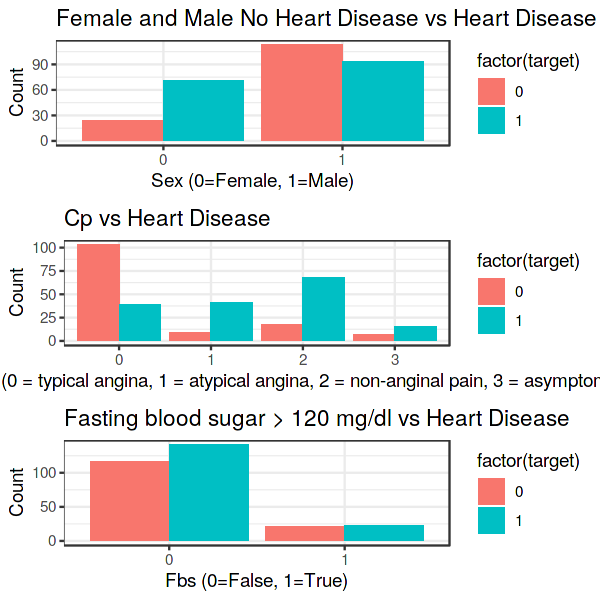

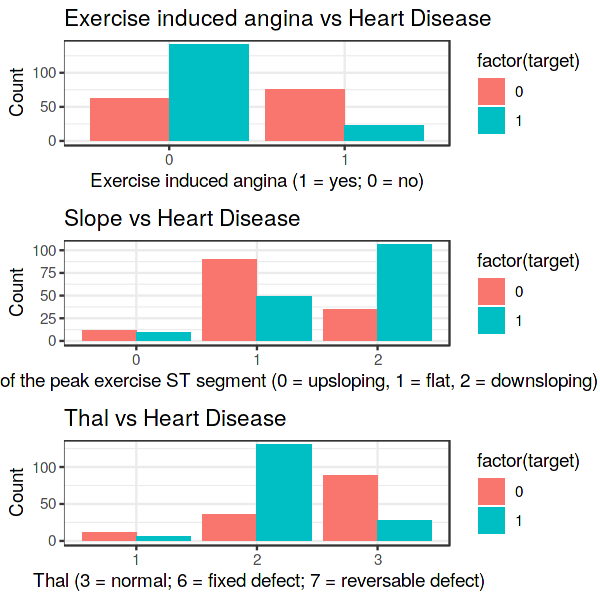

In [39]:
figure <- ggarrange(plotsextarget, plotcptarget, plotfbstarget, plottargetexang, plottargetslope,plottargetthal,
                    nrow = 3, ncol=1)
figure

Code for association <br>
`library("GoodmanKruskal")` <br>
`varSet1 <- c("sex", "cp", "exang","fbs","slope","thal","target")`

In [40]:
#asociación variables categoricas
#heart <- read.csv("~/MASTER ESP/MIEBE SECOND SEMESTER/MACHINE LEARNING/FINAL PROJECT/heart.csv")
#head(heart)
#library("GoodmanKruskal")
#varSet1 <- c("sex", "cp", "exang","fbs","slope","thal","target")
#CarFrame1 <- subset(heart, select = varSet1)
#GKmatrix1 <- GKtauDataframe(CarFrame1)
#plot(GKmatrix1)
#heart$thal


##### General conclusions for data exploration

**Numeric**<br>
- Correlation between numeric variables: among the variables was found a correlation coefficient less than 50% (both positive and negative). _age_ and _thalach_ have the higher value of -0.4 followed by _oldpeak_ and _thalach_ with -0.35. These results show that variables are almost independent. When compared to the target, _oldpeak_ and _thalach_ show the greatest correlation coefficients -0.43 and 0.43, respectively. The lowest value is for _chol_ with -0.09. Therefore, the latter is the less suitable to represent the target

- Histograms of numeric variables: Most of the variables show a normal behavior. Nonetheless, a normalization will be performed for all the variables in next steps 

- Scatter plots numeric variables vs target: The variables with the highest (First 4th) correlation coefficients compared to the target where plotted. The were not significant distinction between classes and target, the entries were widely distributed without any clear pattern

- Bar plots numeric variables vs target: The distribution among each variable for the target in sets of bins was performed. The ranges were the unhealthy observations were the most prevalent among the variables is presented as follows: age (20,40] and (70,80]; resting blood pressure (80,120]; cholesterol  (100,250] and (300, 450], maximum heart rate (150, 225], ST depression induced (0-2], number of major vessels (3,4]

- Boxplot numeric variables vs target: An analysis of the median, max, min, outliers and quartiles for each variable compared to the target was presented. No significant differences were found between the classes (0 and 1) because the boxes were almost overlapping each other. Only for _thalach_(maximum heart rate) was found a slightly differences for 0, the median ~140 and for 1 ~165

**Categorical**<br>
- Although the proportion in Men is almost the double than in women, making an analysis if the proportion of women and men having disease is different, the P value accepted rejected the null hypothesis (<0.05) therefore the proportion is different. Therefore, although the proportion of women in the study was less, they showed more probability of having a disease


- In order to find if the categorical variables are independent a chi.squared test was done, as well as an asociation analysis. Therefore, it was concluded that because the asociation was less than the 28% it can be assumed that this variables are independent and are important to be used the way they are in the prediction models

**All features**<br>
The general behavior of numeric and categorical variables vs target do not required extra processing (logaritmic/exponential/Z transformation, not imputation) or other modifications. Moreover, the individual variables are not relevant _per se_ to directly represent the target. Therefore, models combining the variables are required

#### Dimensionality reduction Feature selection

Feature selection is a crucial step in predictive modeling. This technique achieves supreme importance when a data set comprised of several variables is given for model building. Methods like Principal Component Analysis, Singular Value decomposition etc, usually are unsupervised ways of feature selection. For example, PCA, which uses variance in data to find the components, don't take into account the information between feature values and the target class or values. Also, there are certain assumptions, such as normality, associated with such methods which require some kind of transformations before starting to apply them. These constraints doesn't apply to all kinds of data.

**Boruta** is a feature selection algorithm. Precisely, it works as a wrapper algorithm around Random Forest. This package derive its name from a demon in Slavic mythology who dwelled in pine forests.
Feature selection plays an important role when improving models by feeding in only those features that are uncorrelated and non-redundant is required. Not only it helps in training models faster but also reduces the complexity of the model, makes it easier to interpret and improves the accuracy, precision or recall, other performance metrics.
In wrapper methods, a subset of features is selected and using them train a model. Based on the inferences that draw from the previous model, a decition to add or remove features from the subset must be made. Forward Selection, Backward elimination are some of the examples for wrapper methods.
The wrapper method available in R is in the package called `Boruta` <br>
Source: https://www.datacamp.com/community/tutorials/feature-selection-R-boruta

In [41]:
set.seed(111)
boruta<- Boruta(target~.,data=heart,doTrace=2,maxRuns=500)
print(boruta)

 1. run of importance source...


 2. run of importance source...


 3. run of importance source...


 4. run of importance source...


 5. run of importance source...


 6. run of importance source...


 7. run of importance source...


 8. run of importance source...


 9. run of importance source...


 10. run of importance source...


 11. run of importance source...


After 11 iterations, +3.9 secs: 


 confirmed 9 attributes: age, ca, cp, exang, oldpeak and 4 more;


 rejected 1 attribute: chol;


 still have 3 attributes left.



 12. run of importance source...


 13. run of importance source...


 14. run of importance source...


 15. run of importance source...


After 15 iterations, +5.2 secs: 


 rejected 1 attribute: fbs;


 still have 2 attributes left.



 16. run of importance source...


 17. run of importance source...


 18. run of importance source...


 19. run of importance source...


 20. run of importance source...


 21. run of importance source...


 22. run of importance source...


 23. run of importance source...


 24. run of importance source...


 25. run of importance source...


 26. run of importance source...


 27. run of importance source...


 28. run of importance source...


 29. run of importance source...


 30. run of importance source...


 31. run of importance source...


 32. run of importance source...


 33. run of importance source...


 34. run of importance source...


 35. run of importance source...


 36. run of importance source...


 37. run of importance source...


 38. run of importance source...


 39. run of importance source...


 40. run of importance source...


 41. run of importance source...


 42. run of importance source...


 43. run of importance source...


 44. run of importance source...


 45. run of importance source...


 46. run of importance source...


 47. run of importance source...


 48. run of importance source...


 49. run of importance source...


After 49 iterations, +16 secs: 


 rejected 1 attribute: restecg;


 still have 1 attribute left.



 50. run of importance source...


 51. run of importance source...


 52. run of importance source...


 53. run of importance source...


 54. run of importance source...


 55. run of importance source...


 56. run of importance source...


 57. run of importance source...


 58. run of importance source...


 59. run of importance source...


 60. run of importance source...


 61. run of importance source...


 62. run of importance source...


 63. run of importance source...


 64. run of importance source...


 65. run of importance source...


 66. run of importance source...


 67. run of importance source...


 68. run of importance source...


 69. run of importance source...


 70. run of importance source...


 71. run of importance source...


 72. run of importance source...


 73. run of importance source...


 74. run of importance source...


 75. run of importance source...


 76. run of importance source...


 77. run of importance source...


 78. run of importance source...


 79. run of importance source...


 80. run of importance source...


 81. run of importance source...


 82. run of importance source...


 83. run of importance source...


 84. run of importance source...


 85. run of importance source...


 86. run of importance source...


 87. run of importance source...


 88. run of importance source...


 89. run of importance source...


 90. run of importance source...


 91. run of importance source...


 92. run of importance source...


 93. run of importance source...


 94. run of importance source...


 95. run of importance source...


 96. run of importance source...


 97. run of importance source...


 98. run of importance source...


 99. run of importance source...


 100. run of importance source...


 101. run of importance source...


 102. run of importance source...


 103. run of importance source...


 104. run of importance source...


 105. run of importance source...


 106. run of importance source...


 107. run of importance source...


 108. run of importance source...


 109. run of importance source...


 110. run of importance source...


 111. run of importance source...


 112. run of importance source...


 113. run of importance source...


 114. run of importance source...


 115. run of importance source...


 116. run of importance source...


 117. run of importance source...


 118. run of importance source...


 119. run of importance source...


 120. run of importance source...


 121. run of importance source...


 122. run of importance source...


 123. run of importance source...


 124. run of importance source...


 125. run of importance source...


 126. run of importance source...


 127. run of importance source...


 128. run of importance source...


 129. run of importance source...


 130. run of importance source...


 131. run of importance source...


 132. run of importance source...


 133. run of importance source...


 134. run of importance source...


 135. run of importance source...


 136. run of importance source...


 137. run of importance source...


 138. run of importance source...


 139. run of importance source...


 140. run of importance source...


 141. run of importance source...


 142. run of importance source...


 143. run of importance source...


 144. run of importance source...


 145. run of importance source...


 146. run of importance source...


 147. run of importance source...


 148. run of importance source...


 149. run of importance source...


 150. run of importance source...


 151. run of importance source...


 152. run of importance source...


 153. run of importance source...


 154. run of importance source...


 155. run of importance source...


 156. run of importance source...


 157. run of importance source...


 158. run of importance source...


 159. run of importance source...


 160. run of importance source...


 161. run of importance source...


 162. run of importance source...


 163. run of importance source...


 164. run of importance source...


 165. run of importance source...


 166. run of importance source...


 167. run of importance source...


 168. run of importance source...


 169. run of importance source...


 170. run of importance source...


 171. run of importance source...


 172. run of importance source...


 173. run of importance source...


 174. run of importance source...


 175. run of importance source...


 176. run of importance source...


 177. run of importance source...


 178. run of importance source...


 179. run of importance source...


 180. run of importance source...


 181. run of importance source...


 182. run of importance source...


 183. run of importance source...


 184. run of importance source...


 185. run of importance source...


 186. run of importance source...


 187. run of importance source...


 188. run of importance source...


 189. run of importance source...


 190. run of importance source...


 191. run of importance source...


 192. run of importance source...


 193. run of importance source...


 194. run of importance source...


 195. run of importance source...


 196. run of importance source...


 197. run of importance source...


 198. run of importance source...


 199. run of importance source...


 200. run of importance source...


 201. run of importance source...


 202. run of importance source...


 203. run of importance source...


 204. run of importance source...


 205. run of importance source...


 206. run of importance source...


 207. run of importance source...


 208. run of importance source...


 209. run of importance source...


 210. run of importance source...


 211. run of importance source...


 212. run of importance source...


 213. run of importance source...


 214. run of importance source...


 215. run of importance source...


 216. run of importance source...


 217. run of importance source...


 218. run of importance source...


 219. run of importance source...


 220. run of importance source...


 221. run of importance source...


 222. run of importance source...


 223. run of importance source...


 224. run of importance source...


 225. run of importance source...


 226. run of importance source...


 227. run of importance source...


 228. run of importance source...


 229. run of importance source...


 230. run of importance source...


 231. run of importance source...


 232. run of importance source...


 233. run of importance source...


 234. run of importance source...


 235. run of importance source...


 236. run of importance source...


 237. run of importance source...


 238. run of importance source...


 239. run of importance source...


 240. run of importance source...


 241. run of importance source...


 242. run of importance source...


 243. run of importance source...


 244. run of importance source...


 245. run of importance source...


 246. run of importance source...


 247. run of importance source...


 248. run of importance source...


 249. run of importance source...


 250. run of importance source...


 251. run of importance source...


 252. run of importance source...


 253. run of importance source...


 254. run of importance source...


 255. run of importance source...


 256. run of importance source...


 257. run of importance source...


 258. run of importance source...


 259. run of importance source...


 260. run of importance source...


 261. run of importance source...


 262. run of importance source...


 263. run of importance source...


 264. run of importance source...


 265. run of importance source...


 266. run of importance source...


 267. run of importance source...


 268. run of importance source...


 269. run of importance source...


 270. run of importance source...


 271. run of importance source...


 272. run of importance source...


 273. run of importance source...


 274. run of importance source...


 275. run of importance source...


 276. run of importance source...


 277. run of importance source...


 278. run of importance source...


 279. run of importance source...


 280. run of importance source...


 281. run of importance source...


 282. run of importance source...


 283. run of importance source...


 284. run of importance source...


 285. run of importance source...


 286. run of importance source...


 287. run of importance source...


 288. run of importance source...


 289. run of importance source...


 290. run of importance source...


 291. run of importance source...


 292. run of importance source...


 293. run of importance source...


 294. run of importance source...


 295. run of importance source...


 296. run of importance source...


 297. run of importance source...


 298. run of importance source...


 299. run of importance source...


 300. run of importance source...


 301. run of importance source...


 302. run of importance source...


 303. run of importance source...


 304. run of importance source...


 305. run of importance source...


 306. run of importance source...


 307. run of importance source...


 308. run of importance source...


 309. run of importance source...


 310. run of importance source...


 311. run of importance source...


 312. run of importance source...


 313. run of importance source...


 314. run of importance source...


 315. run of importance source...


 316. run of importance source...


 317. run of importance source...


 318. run of importance source...


 319. run of importance source...


 320. run of importance source...


 321. run of importance source...


 322. run of importance source...


 323. run of importance source...


 324. run of importance source...


 325. run of importance source...


 326. run of importance source...


 327. run of importance source...


 328. run of importance source...


 329. run of importance source...


 330. run of importance source...


 331. run of importance source...


 332. run of importance source...


 333. run of importance source...


 334. run of importance source...


 335. run of importance source...


 336. run of importance source...


 337. run of importance source...


 338. run of importance source...


 339. run of importance source...


 340. run of importance source...


 341. run of importance source...


 342. run of importance source...


 343. run of importance source...


 344. run of importance source...


 345. run of importance source...


 346. run of importance source...


 347. run of importance source...


 348. run of importance source...


 349. run of importance source...


 350. run of importance source...


 351. run of importance source...


 352. run of importance source...


 353. run of importance source...


 354. run of importance source...


 355. run of importance source...


 356. run of importance source...


 357. run of importance source...


 358. run of importance source...


 359. run of importance source...


 360. run of importance source...


 361. run of importance source...


 362. run of importance source...


 363. run of importance source...


 364. run of importance source...


 365. run of importance source...


 366. run of importance source...


 367. run of importance source...


 368. run of importance source...


 369. run of importance source...


 370. run of importance source...


 371. run of importance source...


 372. run of importance source...


 373. run of importance source...


 374. run of importance source...


 375. run of importance source...


 376. run of importance source...


 377. run of importance source...


 378. run of importance source...


 379. run of importance source...


 380. run of importance source...


 381. run of importance source...


 382. run of importance source...


 383. run of importance source...


 384. run of importance source...


 385. run of importance source...


 386. run of importance source...


 387. run of importance source...


 388. run of importance source...


 389. run of importance source...


 390. run of importance source...


 391. run of importance source...


 392. run of importance source...


 393. run of importance source...


 394. run of importance source...


 395. run of importance source...


 396. run of importance source...


 397. run of importance source...


 398. run of importance source...


 399. run of importance source...


 400. run of importance source...


 401. run of importance source...


 402. run of importance source...


 403. run of importance source...


 404. run of importance source...


 405. run of importance source...


 406. run of importance source...


 407. run of importance source...


 408. run of importance source...


 409. run of importance source...


 410. run of importance source...


 411. run of importance source...


 412. run of importance source...


 413. run of importance source...


 414. run of importance source...


 415. run of importance source...


 416. run of importance source...


 417. run of importance source...


 418. run of importance source...


 419. run of importance source...


 420. run of importance source...


 421. run of importance source...


 422. run of importance source...


 423. run of importance source...


 424. run of importance source...


 425. run of importance source...


 426. run of importance source...


 427. run of importance source...


 428. run of importance source...


 429. run of importance source...


 430. run of importance source...


 431. run of importance source...


 432. run of importance source...


 433. run of importance source...


 434. run of importance source...


 435. run of importance source...


 436. run of importance source...


 437. run of importance source...


 438. run of importance source...


 439. run of importance source...


 440. run of importance source...


 441. run of importance source...


 442. run of importance source...


 443. run of importance source...


 444. run of importance source...


 445. run of importance source...


 446. run of importance source...


 447. run of importance source...


 448. run of importance source...


 449. run of importance source...


 450. run of importance source...


 451. run of importance source...


 452. run of importance source...


 453. run of importance source...


 454. run of importance source...


 455. run of importance source...


 456. run of importance source...


 457. run of importance source...


 458. run of importance source...


 459. run of importance source...


 460. run of importance source...


 461. run of importance source...


 462. run of importance source...


 463. run of importance source...


 464. run of importance source...


 465. run of importance source...


 466. run of importance source...


 467. run of importance source...


 468. run of importance source...


 469. run of importance source...


 470. run of importance source...


 471. run of importance source...


 472. run of importance source...


 473. run of importance source...


 474. run of importance source...


 475. run of importance source...


 476. run of importance source...


 477. run of importance source...


 478. run of importance source...


 479. run of importance source...


 480. run of importance source...


 481. run of importance source...


 482. run of importance source...


 483. run of importance source...


 484. run of importance source...


 485. run of importance source...


 486. run of importance source...


 487. run of importance source...


 488. run of importance source...


 489. run of importance source...


 490. run of importance source...


 491. run of importance source...


 492. run of importance source...


 493. run of importance source...


 494. run of importance source...


 495. run of importance source...


 496. run of importance source...


 497. run of importance source...


 498. run of importance source...


 499. run of importance source...


Boruta performed 499 iterations in 2.605631 mins.
 9 attributes confirmed important: age, ca, cp, exang, oldpeak and 4
more;
 3 attributes confirmed unimportant: chol, fbs, restecg;
 1 tentative attributes left: trestbps;


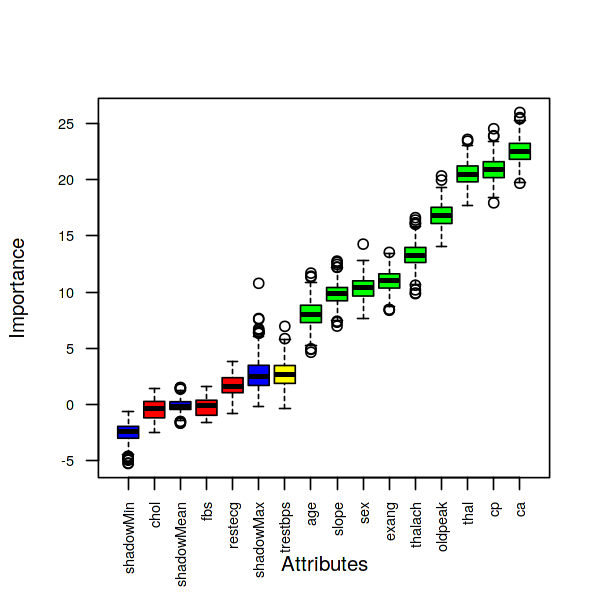

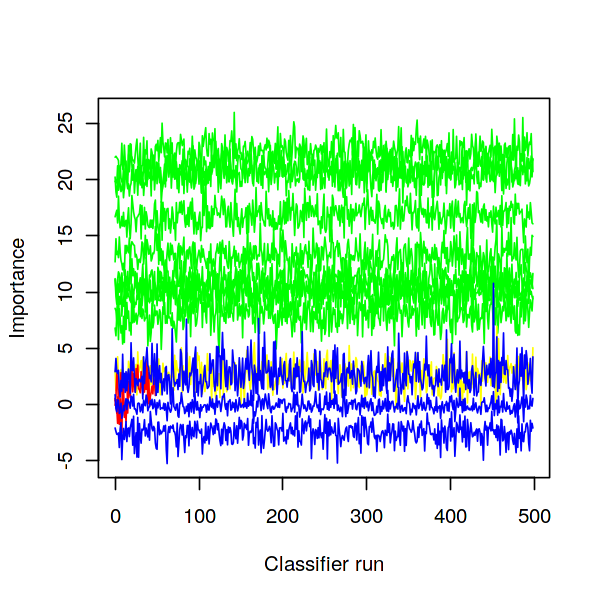

In [42]:
plot(boruta,las=2, cex.axis=0.7)
plotImpHistory(boruta)

In [43]:
#Tentative fix
bor<-TentativeRoughFix(boruta)
print(bor)
attStats(boruta)
getNonRejectedFormula(boruta)
getConfirmedFormula(boruta)

Boruta performed 499 iterations in 2.605631 mins.
Tentatives roughfixed over the last 499 iterations.
 10 attributes confirmed important: age, ca, cp, exang, oldpeak and 5
more;
 3 attributes confirmed unimportant: chol, fbs, restecg;


,meanImp,medianImp,minImp,maxImp,normHits,decision
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
age,8.0468295,8.04719127,4.6571621,11.691575,0.995991984,Confirmed
sex,10.3695082,10.41238902,7.6750545,14.266896,0.997995992,Confirmed
cp,20.9211474,20.90402736,17.9347590,24.522534,1.000000000,Confirmed
trestbps,2.6669370,2.68771745,-0.3845839,6.959539,0.515030060,Tentative
chol,-0.4622686,-0.36879827,-2.5063294,1.443626,0.000000000,Rejected
fbs,-0.1654234,-0.03786923,-1.5764558,1.650382,0.002004008,Rejected
restecg,1.6793203,1.64671166,-0.7437073,3.833266,0.026052104,Rejected
thalach,13.2943871,13.29579191,9.8651951,16.620258,1.000000000,Confirmed
exang,11.0327036,11.07558303,8.3887006,13.534956,1.000000000,Confirmed


target ~ age + sex + cp + trestbps + thalach + exang + oldpeak + 
    slope + ca + thal
<environment: 0x558f60995648>

target ~ age + sex + cp + thalach + exang + oldpeak + slope + 
    ca + thal
<environment: 0x558f56d82f88>

In [44]:
# New dataframe with the relevant features
heart <-subset(heart, select=c(getSelectedAttributes(boruta),"target"))

In [46]:
#Save the resulting dataframe in an excel file in order to use it in the notebook of modeling
#library("xlsx")
write.csv(heart, file = "heart_preprocessed.csv")
      #,sheetName = "USA-ARRESTS", append = FALSE)